#### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
np.set_printoptions(suppress=True)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Import the Data

In [5]:
data = pd.read_csv('Social_Network_Ads.csv')

In [6]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


Removing the `User ID` column

In [7]:
data.drop('User ID', axis=1, inplace=True)

In [8]:
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


#### Splitting the Dependent and Independent Varables

In [9]:
X = data.loc[:, ['Age', 'EstimatedSalary']]
y = data.iloc[:, -1]

#### Splitting the Training and Testing data

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

#### Build a `Naive Bayes` Model

In [19]:
from sklearn.naive_bayes import GaussianNB

In [20]:
classifier = GaussianNB()

#### Training the model

In [21]:
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

#### Making predictions on the Test Set data

In [22]:
y_pred = classifier.predict(X_test)

Below are the predictions

In [25]:
y_pred

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1], dtype=int64)

Below are the actual answers

In [27]:
y_test.values

array([0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1], dtype=int64)

#### Evaluating Naive Bayes model performance using a Confusion Matrix & Heatmap

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [29]:
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

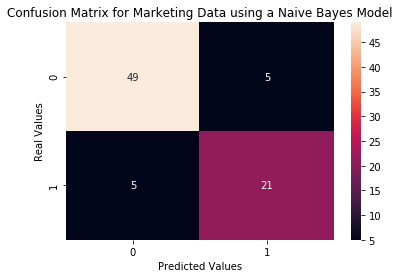

In [30]:
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Real Values')
plt.title('Confusion Matrix for Marketing Data using a Naive Bayes Model')
plt.show()

In [34]:
print("Model Accuracy: {}%".format(accuracy *100))

Model Accuracy: 87.5%


##### Since there are no Hyper-Parameters in a Naive Bayes model, we can't tweak this model further!

#### Making predictions using the Naive Bayes model

In [58]:
questions = np.array([[34, 78000], [58, 115000], [18, 30000]])

In [61]:
answers = classifier.predict(questions)

In [62]:
answers

array([0, 1, 0], dtype=int64)

#### Visual Understanding

In [3]:
# Figure Size
plt.figure(figsize=(16, 10))

# Scatter Plots
plt.scatter(questions[:,0], questions[:, 1], c='b', s=100, label='Questions')  # Questions
plt.scatter(X_train[y_train==0].values[:, 0], X_train[y_train==0].values[:, 1], c='r', s=30, label='Not Purchased')
plt.scatter(X_train[y_train==1].values[:, 0], X_train[y_train==1].values[:, 1], c='g', s=30, label='Purchased')

# Figure Labels
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.title('Scatter-plot of Training Data and the Questions')

# Show the plot
plt.show()

NameError: name 'plt' is not defined